#This jupyter notebook performs data preprocessing on the selected dataset.


This Jupyter notebook handles the preprocessing of the project dataset.


In [ ]:
#Importing necessary modules
import numpy as np
import csv

from operator import add
import math
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Here we are cleaning the raw data and removing errors.
# The result was a significantly smaller dataset after pruning unnecessary dimensions.
# We also reduced the granularity of the data from village level to district level.
def dict_append(dic, lis, key):
    dic[key] = list(map(add, dic[key], lis))
    

dict_dataset = {}
with open('habitation_cleaned.csv', 'rb') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',', quotechar='"')
    dataset = list(csv_file)
    first_pass = True
    line = 0
    for entry in dataset:
        line += 1
        if first_pass:
            first_pass = False
            continue
        list_entry = list(str(entry).split(','))
        trim = lambda i: list_entry[i].replace('"', '')
        state = trim(0)
        state = state.replace('b', '')
        state = state.replace("'", '')
        district = trim(1)
        sc_cur = int(trim(6))
        st_cur = int(trim(7))
        gen_cur = int(trim(8))
        sc_cov = int(trim(9))
        st_cov = int(trim(10))
        gen_cov = int(trim(11))
        
        key_tuple = (state, district)
        value_list = [sc_cur, st_cur, gen_cur, sc_cov, st_cov, gen_cov]
        if not dict_dataset.get(key_tuple):
            dict_dataset[key_tuple] = value_list
        else:
            dict_append(dict_dataset, value_list, key_tuple)

list_dataset = []
csv_columns = ['State', 'District', 'SC Current', 'ST Current', 'General Current', 'SC Covered', 'ST Covered', 'General Covered']
list_dataset.append(csv_columns)
for key,val in dict_dataset.items():
    row = [key[0], key[1]] + val
    print(key,val)
    list_dataset.append(row)

with open('habitation_reduced.csv', 'w') as csv_file: 
    writer = csv.writer(csv_file)
    writer.writerows(list_dataset)

('ANDHRA PRADESH', 'SRIKAKULAM(01)') [205127, 165966, 2034120, 175010, 110945, 1705731]
('ANDHRA PRADESH', 'VIZIANAGARAM(02)') [199213, 226097, 1574066, 178386, 185232, 1394818]
('ANDHRA PRADESH', 'VISAKHAPATNAM(03)') [192661, 613863, 1667583, 155201, 375917, 1377687]
('ANDHRA PRADESH', 'EAST GODAVARI(04)') [863723, 201721, 3226208, 735087, 148446, 2679599]
('ANDHRA PRADESH', 'WEST GODAVARI(05)') [679912, 97694, 2580414, 630575, 89003, 2359853]
('ANDHRA PRADESH', 'KRISHNA(06)') [645648, 98773, 2345107, 599575, 91373, 2179270]
('ANDHRA PRADESH', 'GUNTUR(07)') [622518, 177714, 2624450, 529624, 145646, 2217382]
('ANDHRA PRADESH', 'PRAKASAM(08)') [642375, 120741, 2212451, 490128, 89168, 1688945]
('ANDHRA PRADESH', 'NELLORE(09)') [539402, 230812, 1550418, 474909, 204061, 1353827]
('ANDHRA PRADESH', 'CHITTOOR(10)') [640141, 116341, 2459459, 585171, 107052, 2240233]
('ANDHRA PRADESH', 'KADAPA(11)') [327443, 46716, 1653972, 250616, 33772, 1349274]
('ANDHRA PRADESH', 'ANANTAPUR(12)') [445906, 1

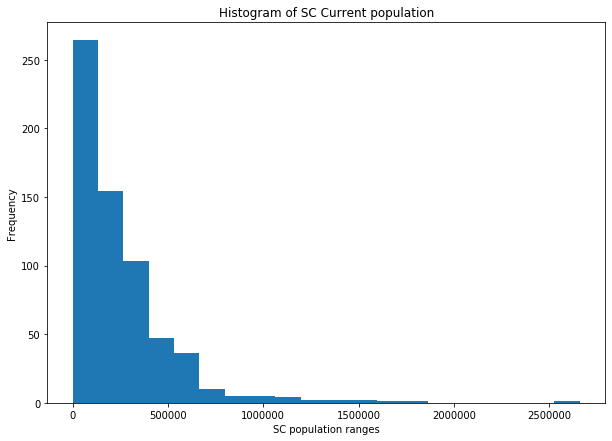

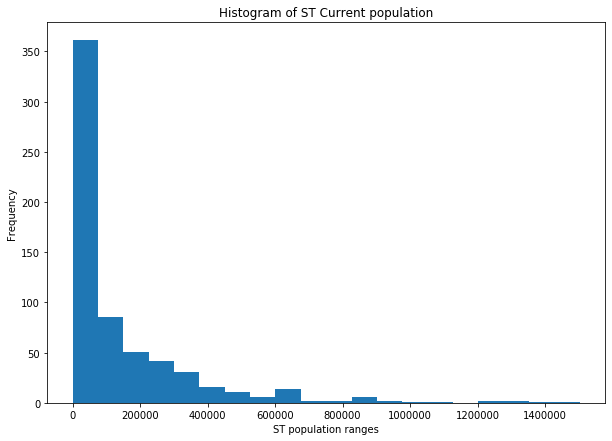

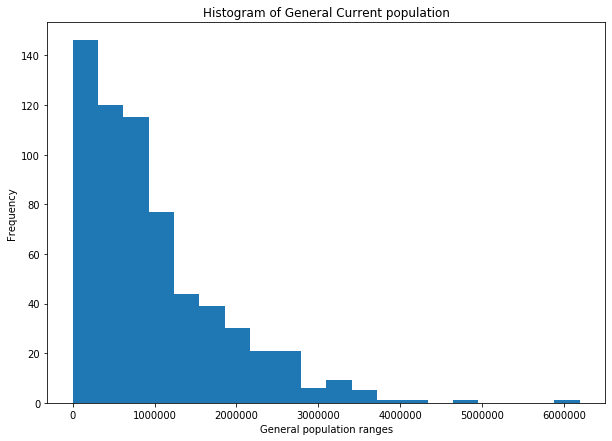

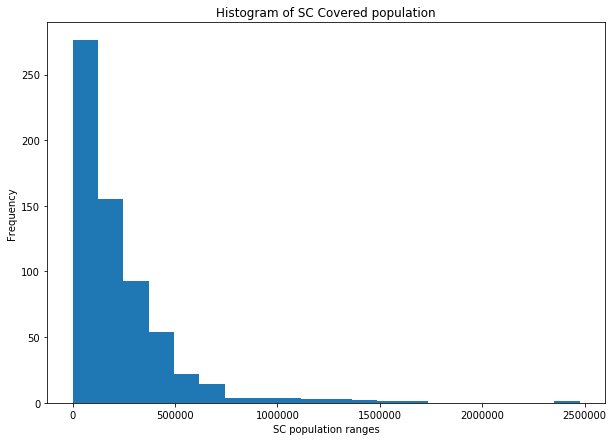

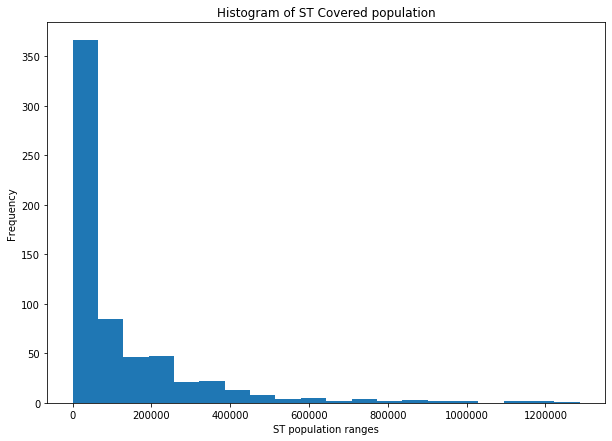

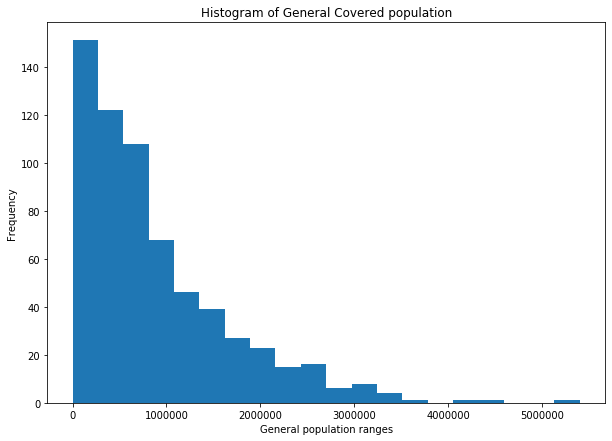

In [3]:
# Here we are trying find correlations between the dimensions
def correlation_coefficient(dataset, x,y):
    sigma_x = 0
    sigma_y = 0
    sigma_xy = 0
    sigma_xx = 0
    sigma_yy = 0
    
    for i in range(1,len(dataset)):
        sigma_x += int(dataset[i][x])
        sigma_y += int(dataset[i][y])
        sigma_xy += int(dataset[i][x]) * int(dataset[i][y])
        sigma_xx += int(dataset[i][x]) ** 2
        sigma_yy += int(dataset[i][y]) ** 2
    
    n = len(dataset) - 1
    r = (n * sigma_xy - sigma_x * sigma_y) / math.sqrt((n * sigma_xx - sigma_x ** 2) * (n * sigma_yy - sigma_y ** 2))
    return r


with open('habitation_reduced.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(list(rec) for rec in csv.reader(f, delimiter=','))
    sc_cur_st_cur_r = correlation_coefficient(data, 2, 3)
    st_cur_gen_cur_r = correlation_coefficient(data, 3, 4)
    sc_cur_gen_cur_r = correlation_coefficient(data, 2, 4)
    
    current_r_matrix = [[1.0, sc_cur_st_cur_r, sc_cur_gen_cur_r],
                        [-sc_cur_st_cur_r, 1.0, st_cur_gen_cur_r],
                        [-sc_cur_gen_cur_r, -st_cur_gen_cur_r, 1.0]]
    
    sc_cov_st_cov_r = correlation_coefficient(data, 5, 6)
    st_cov_gen_cov_r = correlation_coefficient(data, 6, 7)
    sc_cov_gen_cov_r = correlation_coefficient(data, 5, 7)
    
    covered_r_matrix = [[1.0, sc_cur_st_cur_r, sc_cur_gen_cur_r],
                        [-sc_cur_st_cur_r, 1.0, st_cur_gen_cur_r],
                        [-sc_cur_gen_cur_r, -st_cur_gen_cur_r, 1.0]]
    
    print(current_r_matrix)
    print(covered_r_matrix)
    
    # print(data)
    


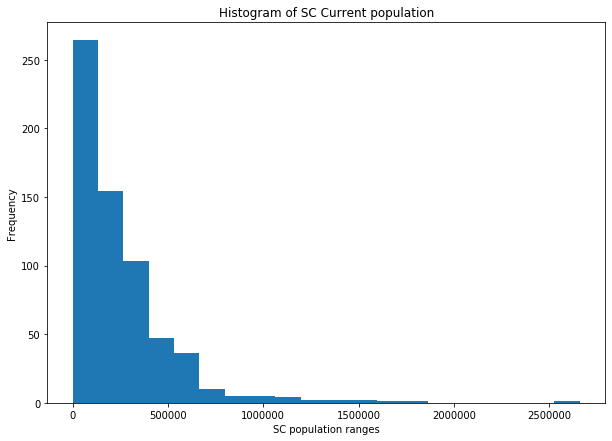

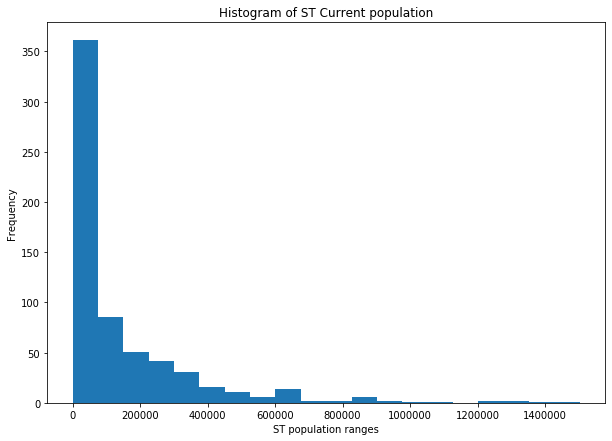

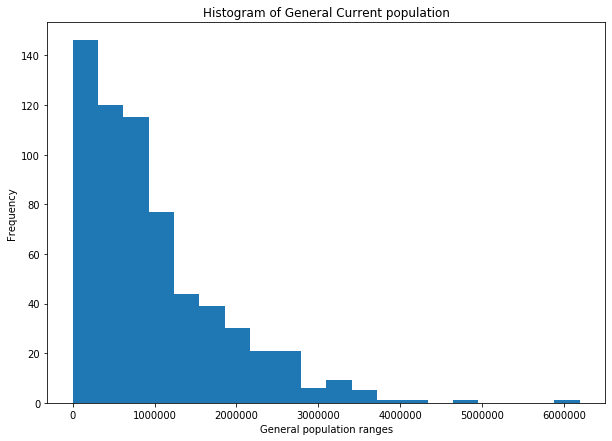

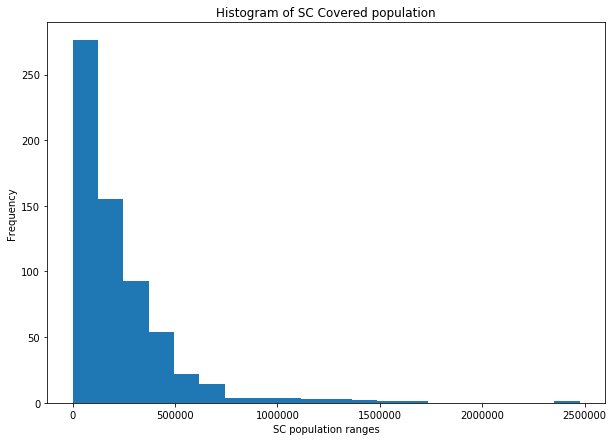

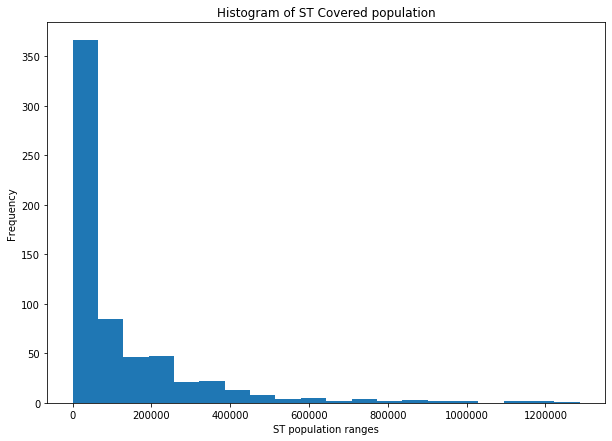

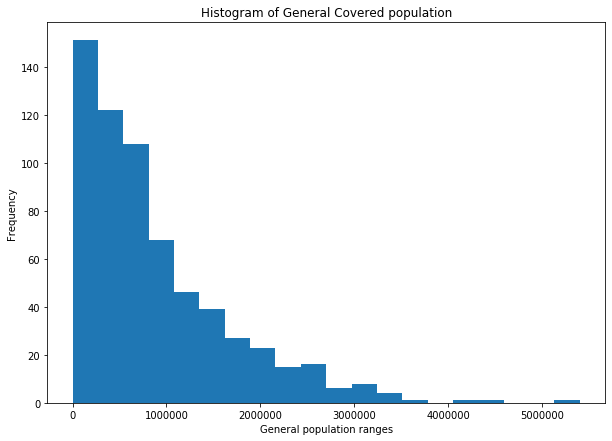

In [5]:
# SC vs ST current
jdata = data[1:]
# print(jdata)
x = [row[2] for row in jdata]
y = [row[3] for row in jdata]
plt.scatter(x,y)
plt.show()


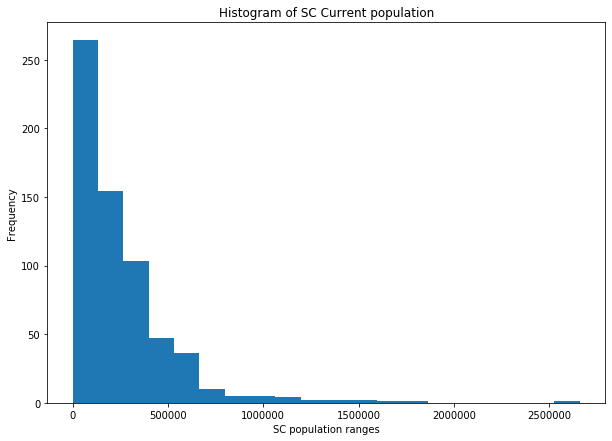

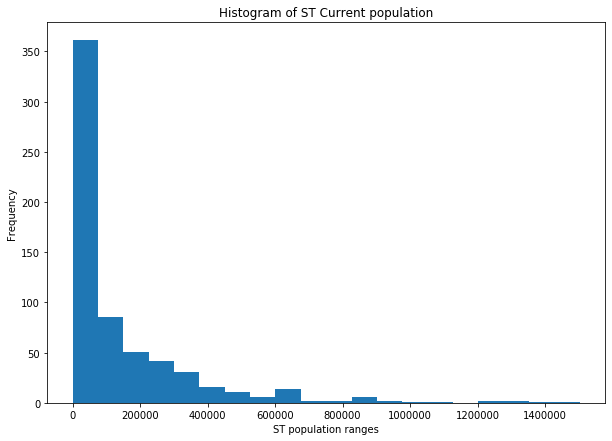

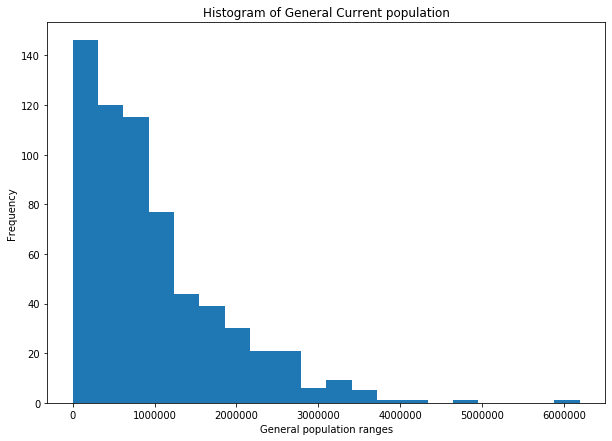

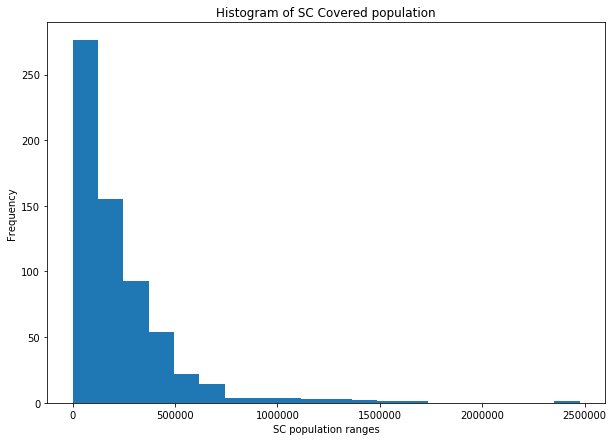

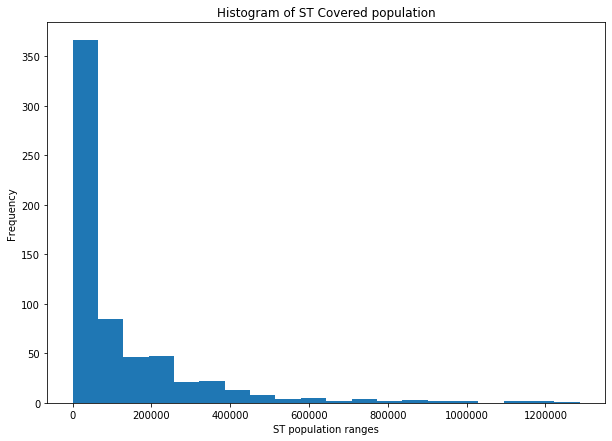

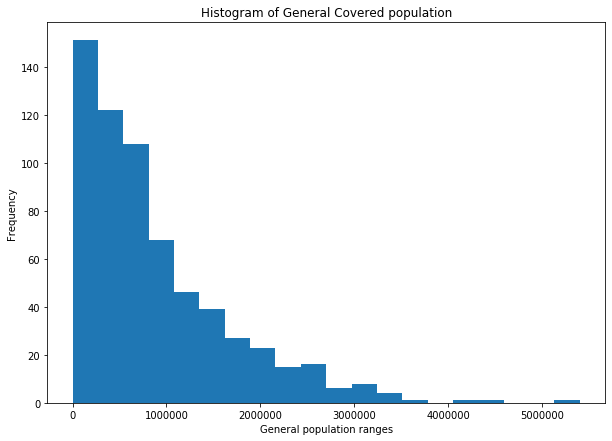

In [6]:
#ST vs General current
x = [row[3] for row in jdata]
y = [row[4] for row in jdata]
plt.scatter(x,y)
plt.show()


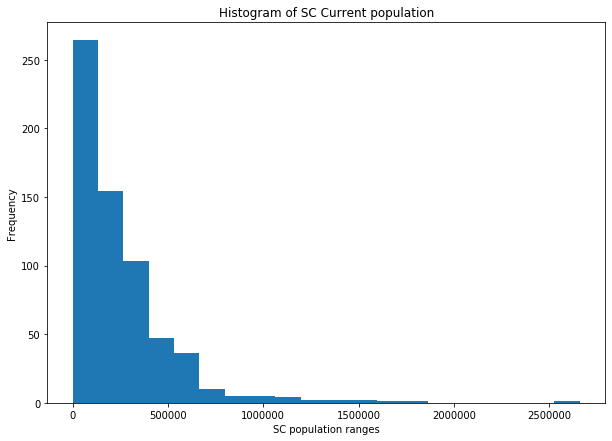

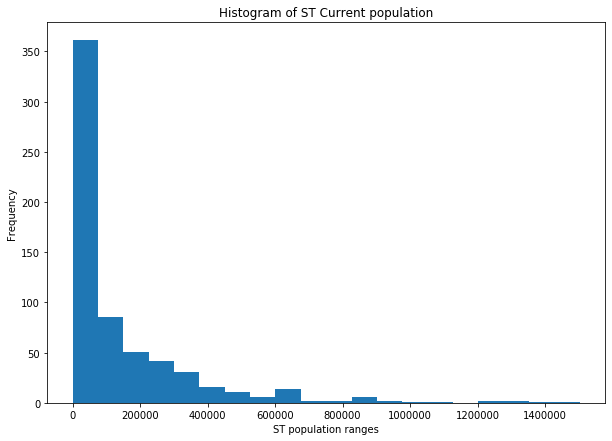

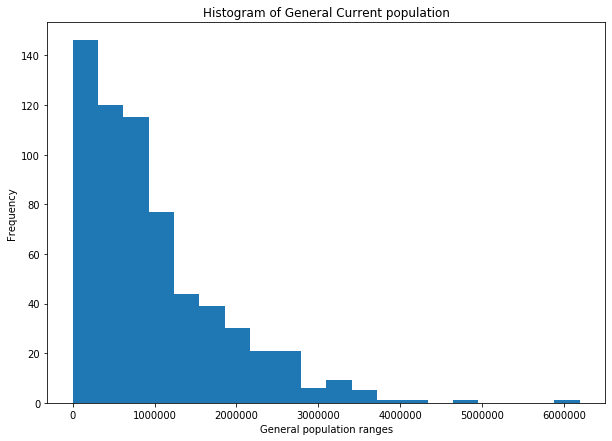

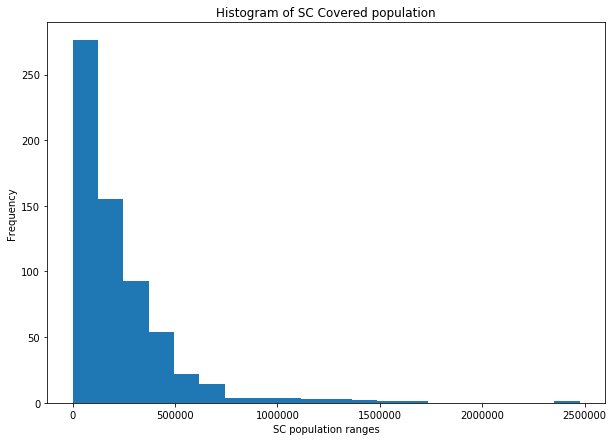

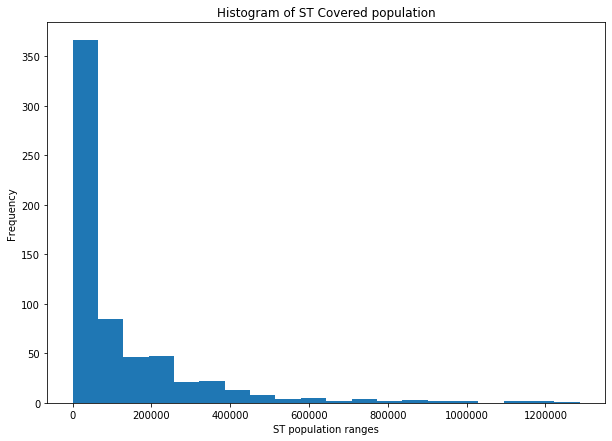

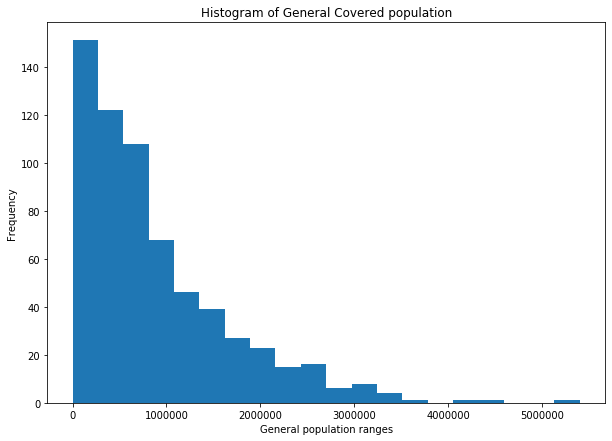

In [7]:
#SC vs General current
x = [row[2] for row in jdata]
y = [row[4] for row in jdata]
plt.scatter(x,y)
plt.show()


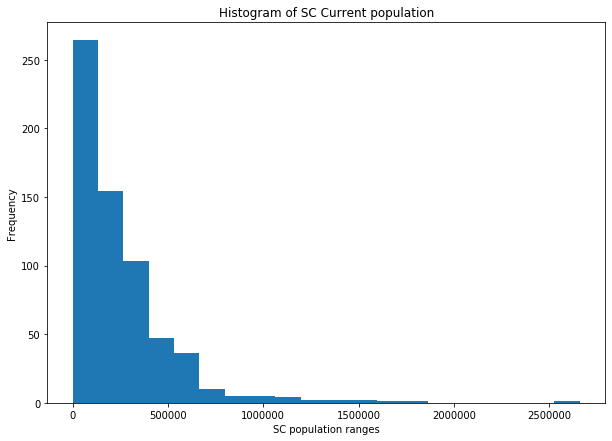

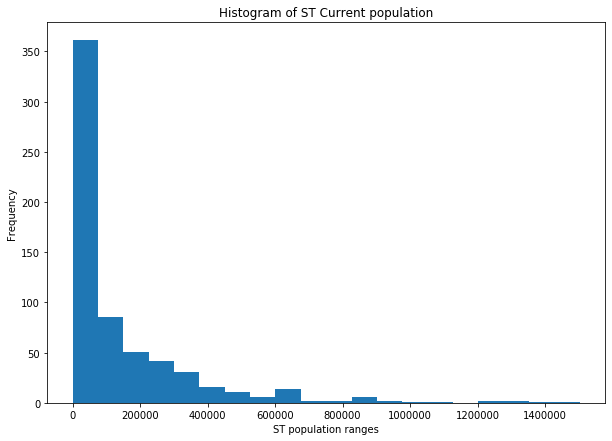

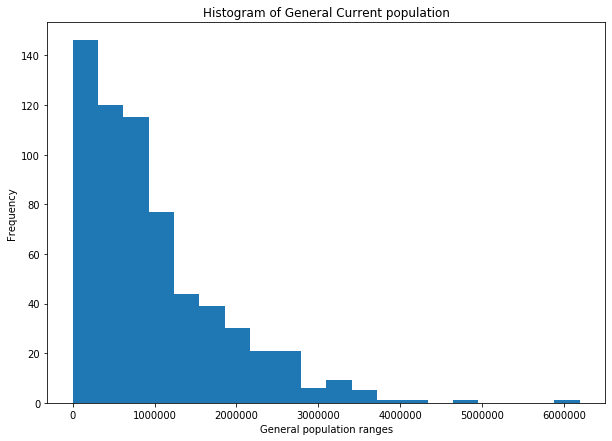

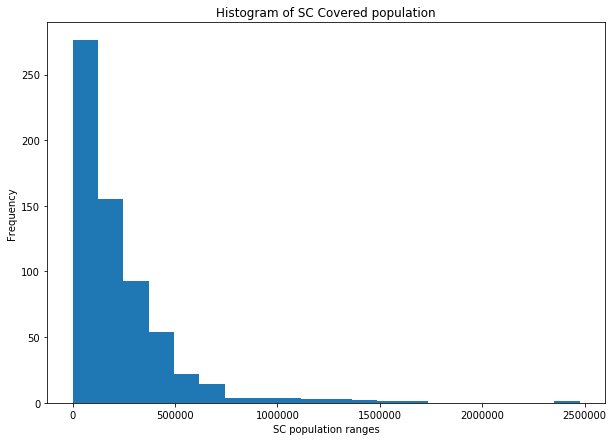

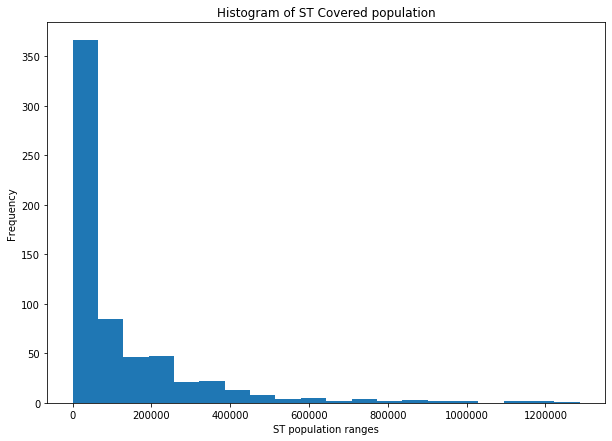

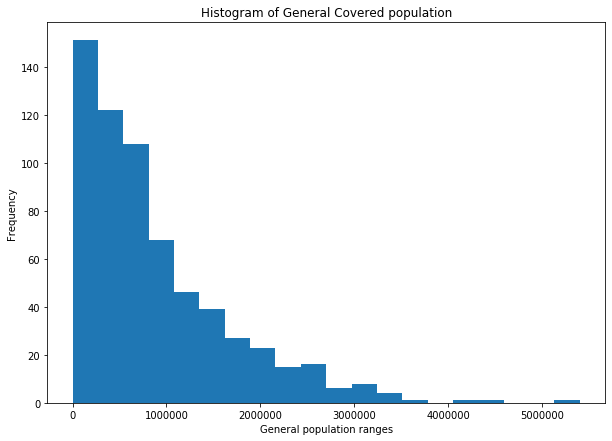

In [8]:
# SC vs ST covered
x = [row[5] for row in jdata]
y = [row[6] for row in jdata]
plt.scatter(x,y)
plt.show()


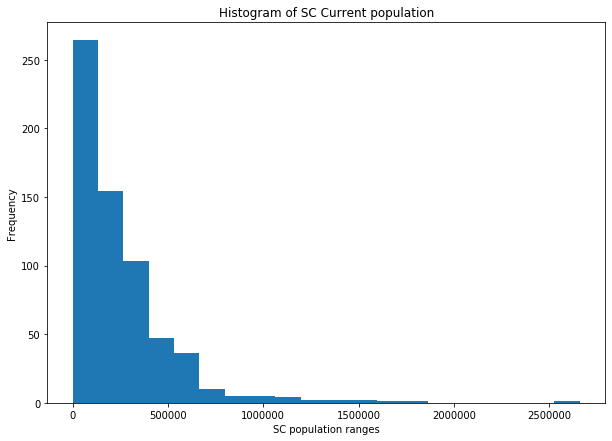

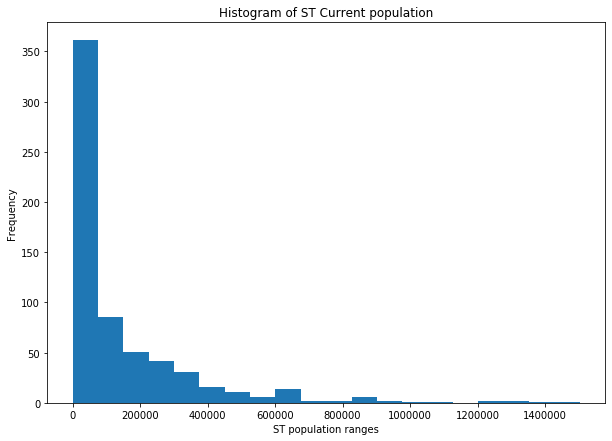

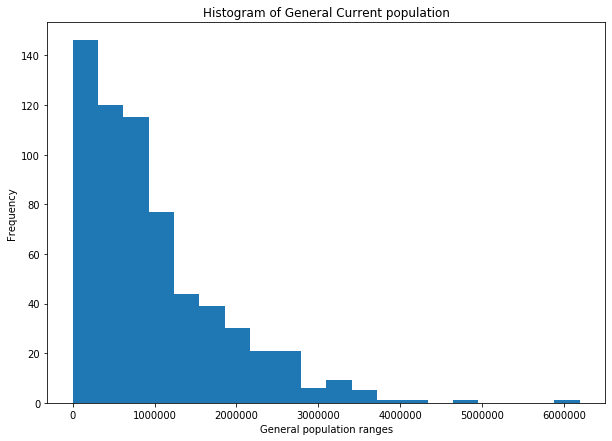

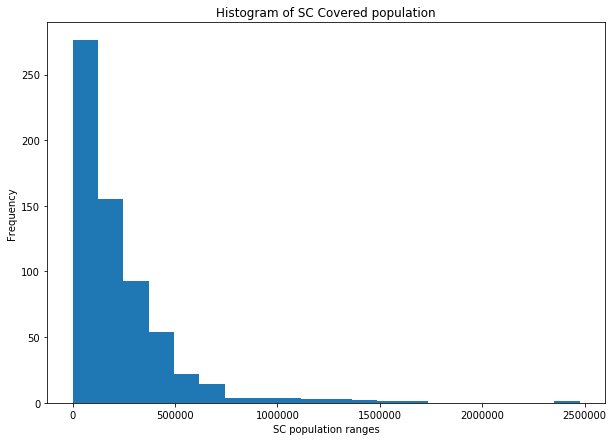

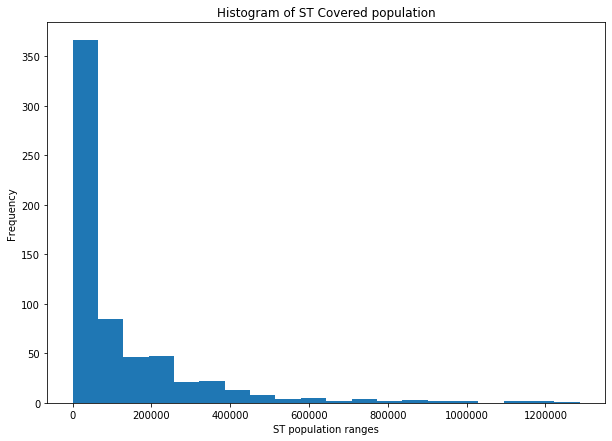

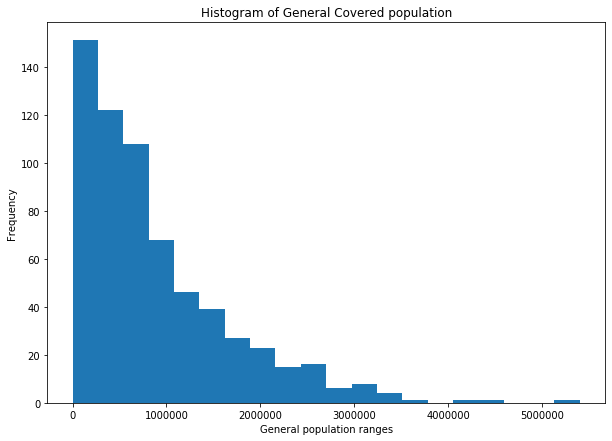

In [9]:
#ST vs General covered
x = [row[6] for row in jdata]
y = [row[7] for row in jdata]
plt.scatter(x,y)
plt.show()


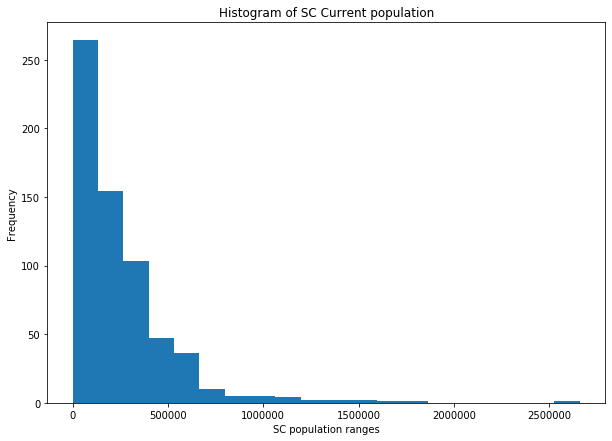

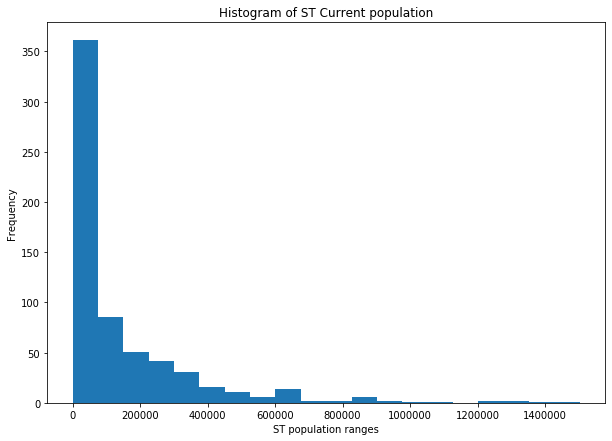

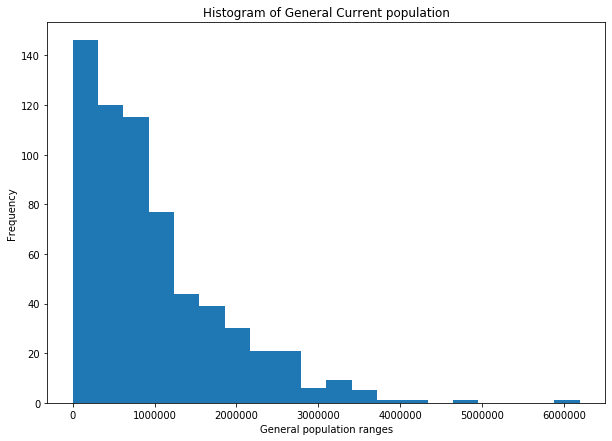

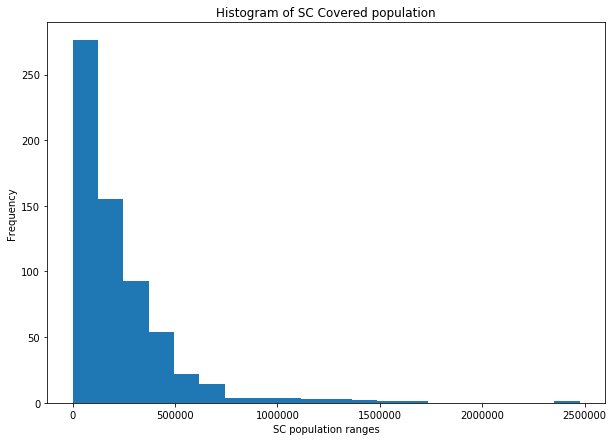

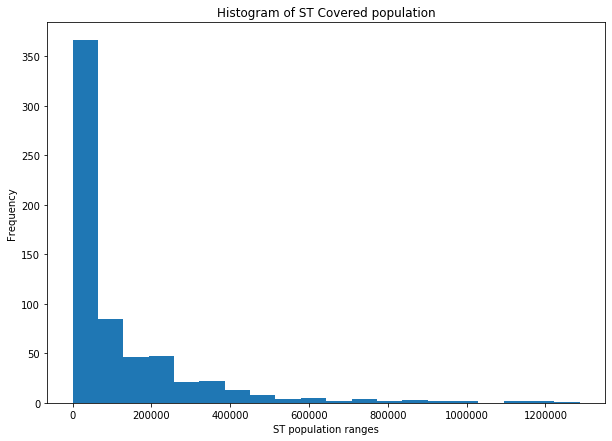

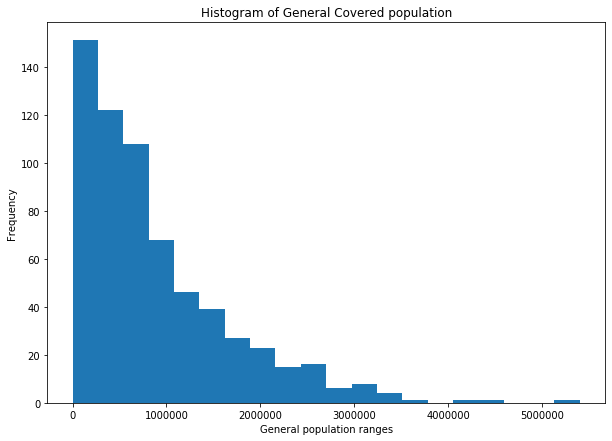

In [10]:
#SC vs General covered
x = [row[5] for row in jdata]
y = [row[7] for row in jdata]
plt.scatter(x,y)
plt.show()


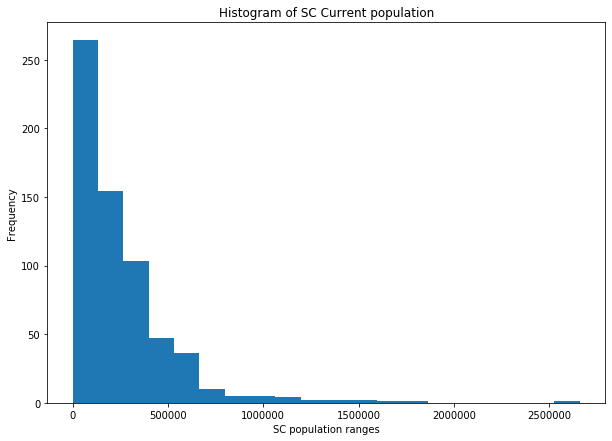

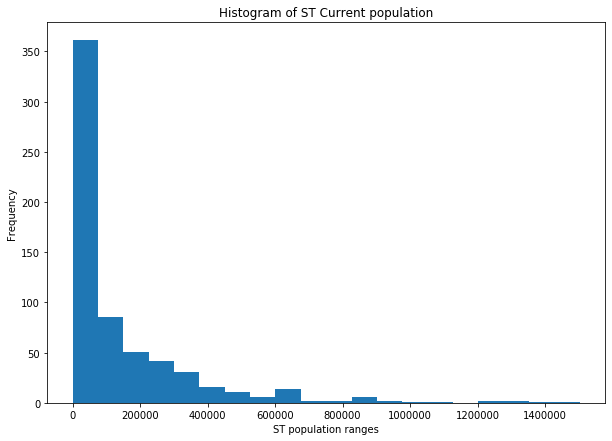

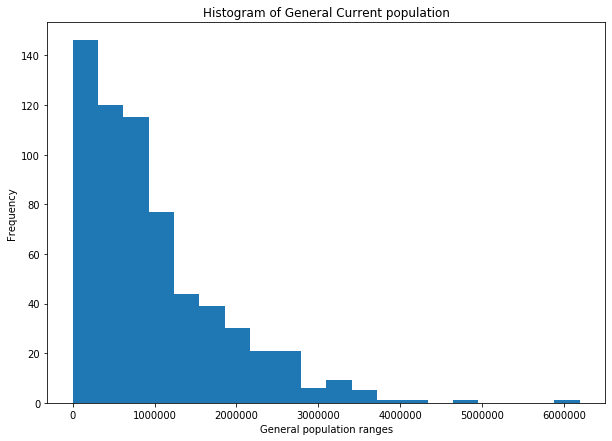

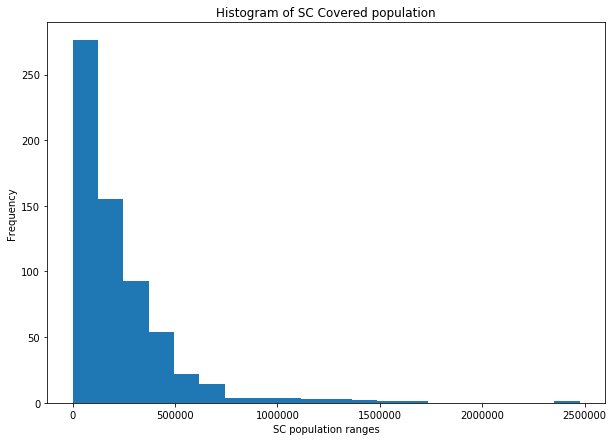

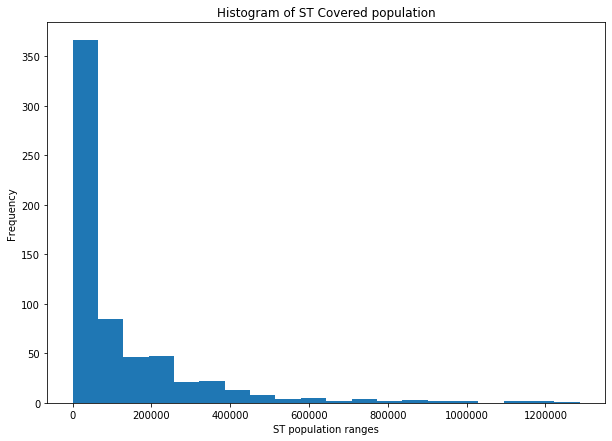

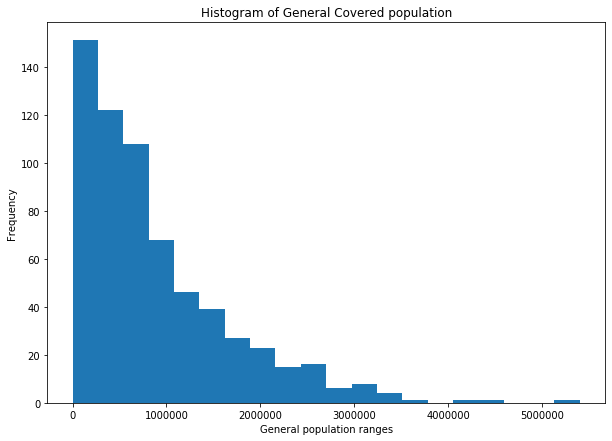

In [15]:
#Binning of data
datah = pd.read_csv("habitation_reduced.csv") 

plt.figure(figsize = (10, 7)) 
plt.title('Histogram of SC Current population')
plt.xlabel('SC population ranges')
datah['SC Current'].plot.hist(bins = 20) 

plt.figure(figsize = (10, 7)) 
plt.title('Histogram of ST Current population')
plt.xlabel('ST population ranges')
datah['ST Current'].plot.hist(bins = 20)

plt.figure(figsize = (10, 7)) 
plt.title('Histogram of General Current population')
plt.xlabel('General population ranges')
datah['General Current'].plot.hist(bins = 20)

plt.figure(figsize = (10, 7)) 
plt.title('Histogram of SC Covered population')
plt.xlabel('SC population ranges')
datah['SC Covered'].plot.hist(bins = 20)

plt.figure(figsize = (10, 7)) 
plt.title('Histogram of ST Covered population')
plt.xlabel('ST population ranges')
datah['ST Covered'].plot.hist(bins = 20)

plt.figure(figsize = (10, 7)) 

plt.title('Histogram of General Covered population')
plt.xlabel('General population ranges')
datah['General Covered'].plot.hist(bins = 20)
